In [1]:
from LineageTrack.lineage_tracker import LineageTrack

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.signal import find_peaks

Load the data for cells from a directory containing the csv files only or input all the file paths

In [2]:
directory = "D:\\UROP-Data\\new_csv"
exp = LineageTrack(directory)
print(exp)
# or
# filepath1 = ""
# filepath2 = ""
# ...
# exp = LineageTrack(filepath1, filepath2, ...)

Looking for data at these locations:
D:\UROP-Data\new_csv\2022_04_22_PC_data_epoch_20_prob_99.csv
D:\UROP-Data\new_csv\2022_04_22_RFP_data_epoch_20_prob_99.csv
D:\UROP-Data\new_csv\2022_04_22_YFP_data_epoch_20_prob_99.csv
Finished loading the data
   trench_id  time_(mins)  label   area  major_axis_length  minor_axis_length  \
0        0.0          0.0    1.0  238.0          53.914722           7.221878   

   centroid-0  centroid-1  centroid_local-0  centroid_local-1  \
0   94.672272   65.420166          23.67227          4.420168   

   PC_intensity_mean  mCherry_intensity_mean  YFP_intensity_mean  
0        2048.146973             2647.348633          148.050415  
(428063, 13)

            Read 3 files
            Channels: ['PC', 'YFP', 'mCherry']
            Properties for each cell: ['PC_intensity_mean', 'YFP_intensity_mean', 'area', 'centroid-0', 'centroid-1', 'centroid_local-0', 'centroid_local-1', 'label', 'mCherry_intensity_mean', 'major_axis_length', 'minor_axis_length', 'ti

### strategy 3 on the Log Book
Estimate the growth rate and doubling time

Model: $L = L_0 \times 2^{(t / \tau)}$

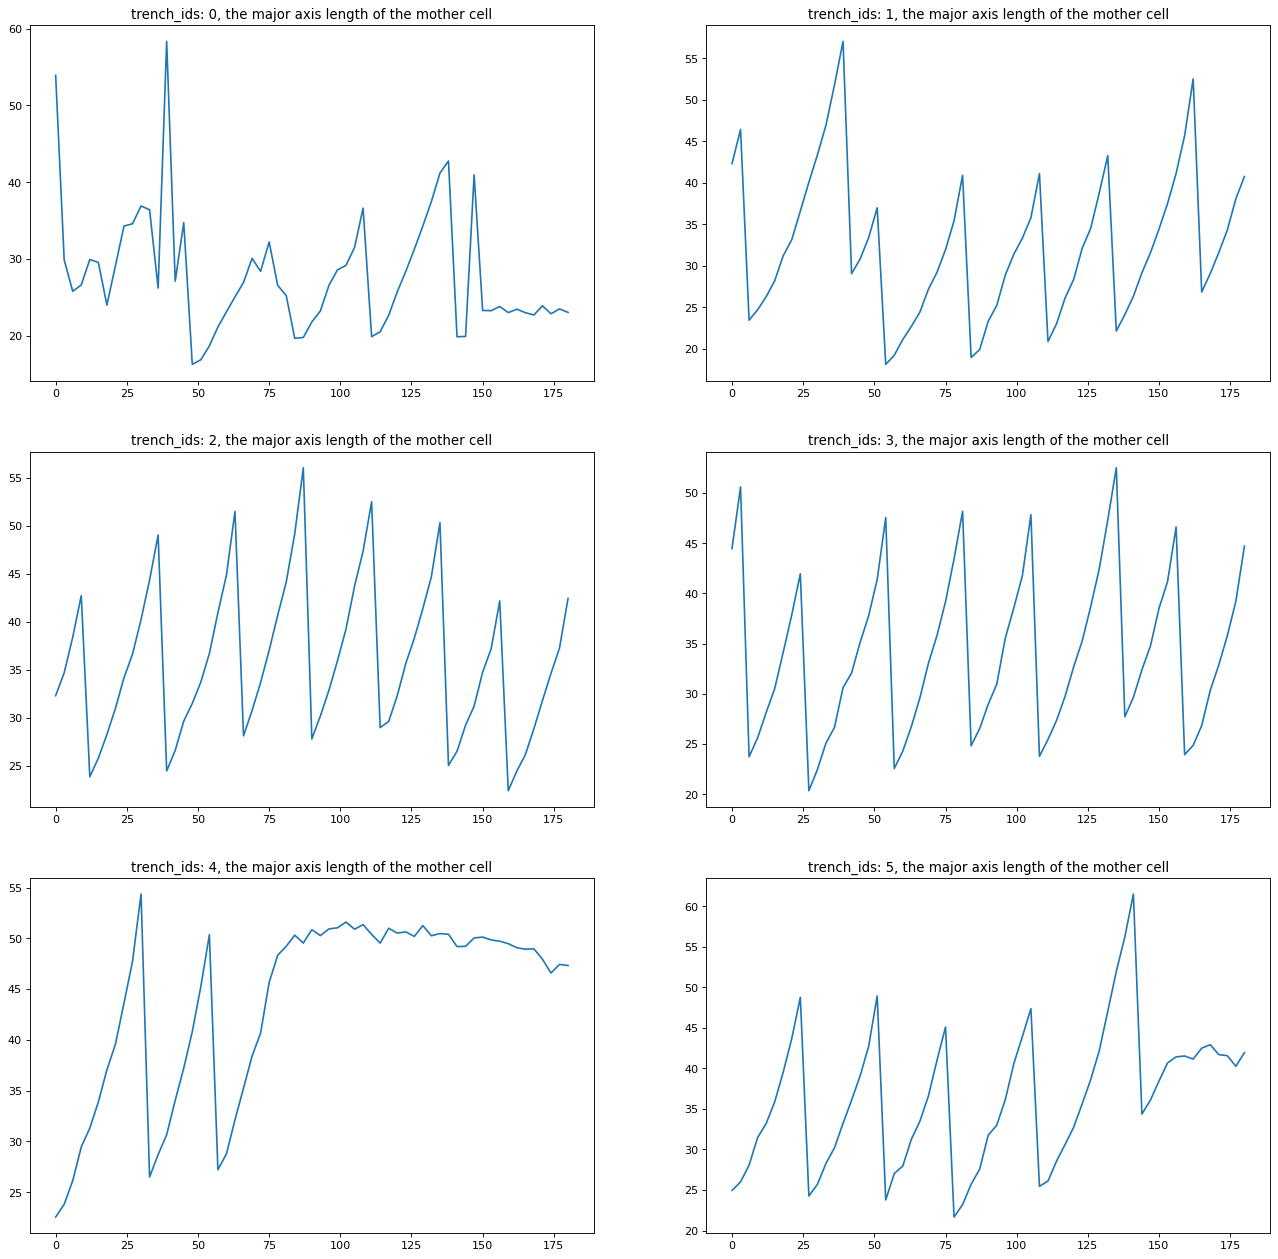

In [3]:
trench_list = [i for i in range(6)]

m = exp.get_mother_cell_growth(trench_list, plot=True)

Find the division times for trench 1

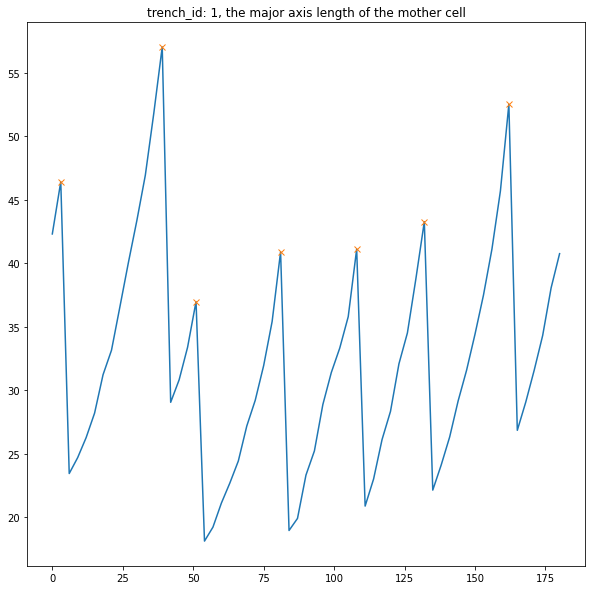

[[  3.          46.41300583]
 [ 39.          57.02418137]
 [ 51.          36.97775269]
 [ 81.          40.89678574]
 [108.          41.11452484]
 [132.          43.26797485]
 [162.          52.50556564]]


In [4]:
#from scipy.signal import find_peaks
#import matplotlib.pyplot as plt

#trench = 7
#mcell = exp.df.loc[(exp.df["label"] == 1) & (exp.df["trench_id"] == trench), ["time_(mins)", "major_axis_length"]].copy()
#mcell = mcell.to_numpy()
#peaks = find_peaks(mcell[:,1], threshold=1, distance=3)
#print(peaks)

#plt.figure(figsize=(10, 10))
#plt.plot(mcell[:, 0], mcell[:, 1])
#for p in peaks[0]:
#    print(p)
#    print(mcell[p, :])
#    plt.plot(mcell[p, :][0], mcell[p, :][1], "x")
#plt.title(f"trench_id: {trench}, the major axis length of the mother cell")
#plt.show()
mcell, idx = exp.find_division(1)

peaks = [mcell[1][i, :] for i in idx]
peaks = np.array(peaks)
print(peaks)

Select the peaks between the exponential growth phase, calculate intervals between division and for each interval, estimate the growth constant

[36.0, 12.0, 30.0, 27.0, 24.0, 30.0]
the slope is estimated to be 0.038872735918546425
the intercept is estimated to be 4.501272528268139


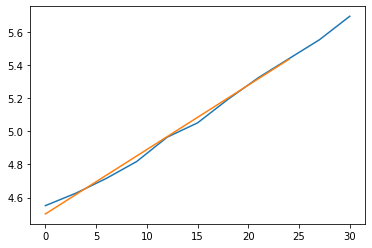

the slope is estimated to be 0.033439747875788996
the intercept is estimated to be 4.855506304192734


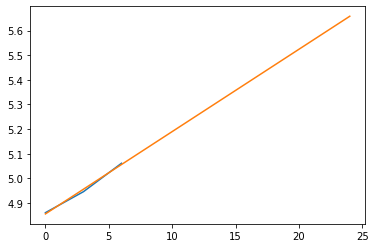

the slope is estimated to be 0.04031699186300881
the intercept is estimated to be 4.153692489401551


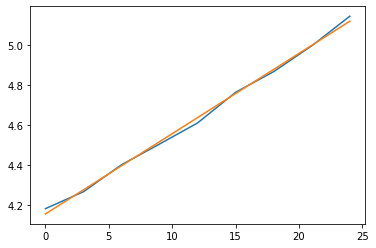

the slope is estimated to be 0.04608023385585186
the intercept is estimated to be 4.241794711916694


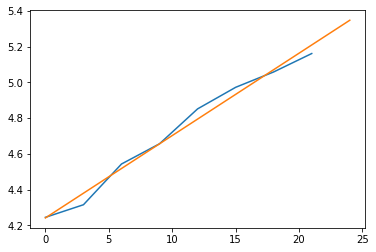

the slope is estimated to be 0.0493229777528664
the intercept is estimated to be 4.388885019014377


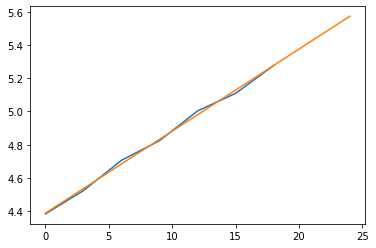

the slope is estimated to be 0.04304354489620594
the intercept is estimated to be 4.465180328222813


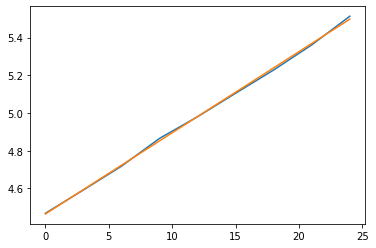

[36.0, 12.0, 30.0, 27.0, 24.0, 30.0]
[0.038872735918546425, 0.033439747875788996, 0.04031699186300881, 0.04608023385585186, 0.0493229777528664, 0.04304354489620594]


In [5]:
# slice it according to the data
e_phase_idx = idx[:]

exp.collect_model_para(mcell, e_phase_idx, plot=True)
print(exp.div_intervals)
print(exp.growth_taus)

#e_peaks = [mcell[p, :] for p in e_phase_idx]
#e_peaks = np.array(e_peaks)

#intervals = [e_peaks[i+1][0] - e_peaks[i][0] for i in range(len(e_peaks)-1)]
#division_time += intervals
#print(division_time)

#for i in range(len(e_phase_idx)-1):
#    growth = mcell[e_phase_idx[i]+1:e_phase_idx[i+1]]
#    print(growth)
#    plt.plot(growth[:, 0] - growth[0, 0], np.log2(growth[:, 1]))
#    slope, inter, r, p, se = linregress(growth[:, 0], np.log2(growth[:, 1]))
#    print(slope)
#    print(inter)
#    growth_tau.append(slope)
#    growth_scale.append(inter)
#    plt.show()

Repeat for trench 2, and so on

In [6]:
# mcell, idx = exp.find_division(2)

In [7]:
# slice it according to the data
# e_phase_idx = idx[:]    # in this case data between every peaks can be used

# exp.collect_model_para(mcell, e_phase_idx)

In [8]:
# mcell, idx = exp.find_division(3)

In [9]:
# slice it according to the data
# e_phase_idx = idx[:]    # in this case data between every peaks can be used

# exp.collect_model_para(mcell, e_phase_idx)

In [10]:
# mcell, idx = exp.find_division(4)

In [11]:
# slice it according to the data
# e_phase_idx = idx[:-1]    # do not use the last peak

# exp.collect_model_para(mcell, e_phase_idx)
# exp.collect_model_para(mcell, e_phase_idx)

In [12]:
# print(exp.div_intervals)
# print(exp.growth_taus)

# exp.update_model_para()

In [13]:
# mcell, idx = exp.find_division(5)

In [14]:
# slice it according to the data
# e_phase_idx = idx[:]

# exp.collect_model_para(mcell, e_phase_idx)
exp.update_model_para()


                The average time interval for division is 26.5
                The time constant for exponential growth is 23.897124583748937


`threshold` is the limit of the centroid y axis - this is to limit the number of cells to look at in each trench
`max_dpf` is the maximum division per frame to simulate

In [15]:
exp.track_trench(trench=1, threshold=250, max_dpf=1)
print(exp.next_track)
print(exp.current_lysis)
print(exp.track_df)
print(exp.lysis_df)

looking at cells: 
cell in trench 1.0 at 0.0 min with label 1.0
cell in trench 1.0 at 0.0 min with label 2.0
cell in trench 1.0 at 0.0 min with label 3.0
cell in trench 1.0 at 0.0 min with label 4.0
cell in trench 1.0 at 0.0 min with label 5.0
[[ 46.41300583 123.45041656]
 [ 21.5424099  160.63063049]
 [ 20.04176712 182.84762573]
 [ 23.22191811 209.98245239]
 [ 21.75248718 236.19468689]]
the simulated scenario: 
['Growing', 'Growing', 'Growing', 'Growing', 'Growing']
with probability: 
0.5338232003094631
[[ 46.14741629 111.25314578]
 [ 45.87095893 159.22133684]
 [ 24.07349398 198.02035601]
 [ 22.08988585 223.24879161]
 [ 21.5311596  249.96198901]]
score: 
0.00414964684519459
score_futures result:
[12.200161982950005, 24.36933332715787, 11.992369710559327, 12.950291210101065, 67.13088743634417]
[1.0, 2.0, 4.0, 5.0, 3.0]



the simulated scenario: 
['Growing', 'Growing', 'Divided!', 'Growing', 'Growing']
with probability: 
0.33507579443625973
[[ 46.14741629 111.25314578]
 [ 45.87095893 15